# Multicolinearity

In [1]:
import pandas as pd
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.utils import resample

In [2]:
data = pd.read_csv('MPB-Dataset_Clean.csv')

In [3]:
data['postcode'] = data['postcode'].astype(object)

In [4]:
correlations_matrix = data.corr()
correlations_matrix

C:\Users\PC\AppData\Local\Temp\ipykernel_20240\3143150681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = data.corr()


,target,bathroom,m2,bedrooms,number_bedrooms
target,1.000000,0.626350,0.726509,0.209245,0.591544
bathroom,0.626350,1.000000,0.638609,0.227738,0.589303
m2,0.726509,0.638609,1.000000,0.262693,0.732518
bedrooms,0.209245,0.227738,0.262693,1.000000,0.177007
number_bedrooms,0.591544,0.589303,0.732518,0.177007,1.000000


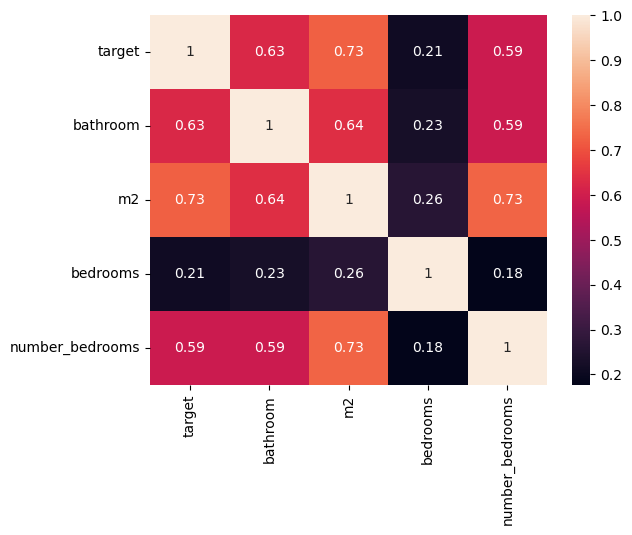

In [5]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [6]:
def countplot(df):
    for column in df.columns:
        plt.figure(figsize = (5, 3))
        sns.set_palette("rocket")
        sns.countplot(data = df, y = column)        
        plt.show()
    return None 

In [7]:
data_cat = data.select_dtypes(include = np.object)

C:\Users\PC\AppData\Local\Temp\ipykernel_20240\4069041091.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_cat = data.select_dtypes(include = np.object)


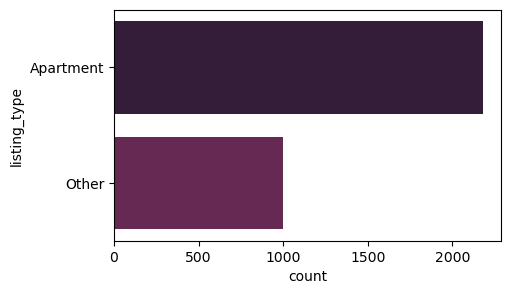

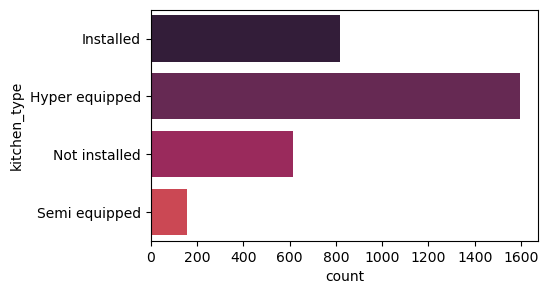

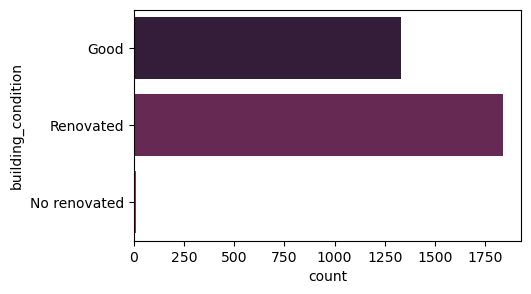

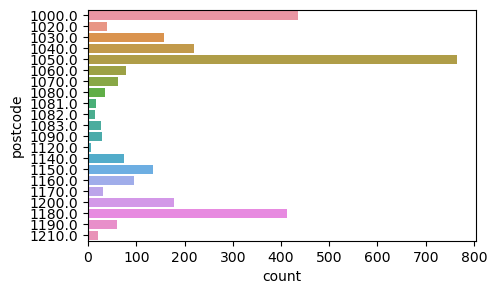

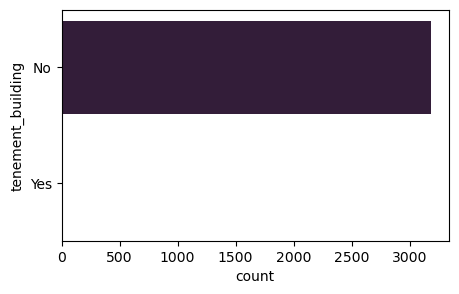

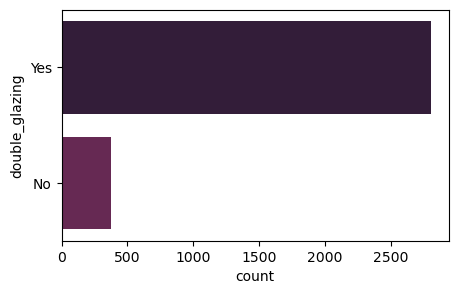

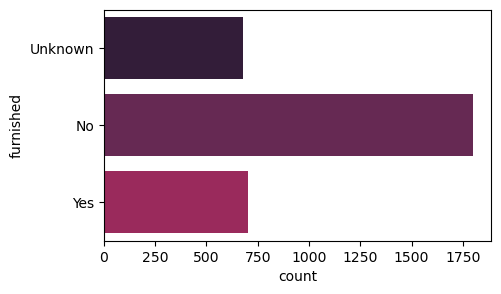

In [8]:
countplot(data_cat)

# Train-Test Split

In [9]:
y = data['target']
X = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train_cat = X_train.select_dtypes(include = np.object)
X_test_cat = X_test.select_dtypes(include = np.object)
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)

C:\Users\PC\AppData\Local\Temp\ipykernel_20240\2694347417.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train.select_dtypes(include = np.object)
C:\Users\PC\AppData\Local\Temp\ipykernel_20240\2694347417.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat = X_test.select_dtypes(include = np.object)


# Treat Categorical

In [11]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

In [12]:
X_train_cat_encoded_array = encoder.transform(X_train_cat).toarray()
X_train_cat_treated = pd.DataFrame(X_train_cat_encoded_array, columns = encoder.get_feature_names_out(input_features = X_train_cat.columns ))

X_test_cat_encoded_array = encoder.transform(X_test_cat).toarray()
X_test_cat_treated = pd.DataFrame(X_test_cat_encoded_array, columns = encoder.get_feature_names_out(input_features = X_train_cat.columns ))

# Treat Numerical

In [13]:
num_transformer = MinMaxScaler().fit(X_train_num)

In [14]:
X_train_num_transformed_array = num_transformer.transform(X_train_num)
X_train_num_treated = pd.DataFrame(X_train_num_transformed_array, columns = X_train_num.columns)

X_test_num_transformed_array = num_transformer.transform(X_test_num)
X_test_num_treated = pd.DataFrame(X_test_num_transformed_array, columns = X_test_num.columns)

# display(X_train_num_treated)
# display(X_test_num_treated)

# Concatenate

In [15]:
X_train = pd.concat([X_train_num_treated, X_train_cat_treated], axis=1)
X_test = pd.concat([X_test_num_treated, X_test_cat_treated], axis=1)

# display(X_train)
# display(X_test)

# Linnear Regression

In [16]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
predictions_lm = lm.predict(X_test)
r2_score(y_test, predictions_lm)

0.6732311732958958

> This is the final, improved, result